<a href="https://colab.research.google.com/github/alvinrach/24-NLP-LSTM-News-Title-Classification/blob/main/NLP_LSTM_(PyTorch)_News_Title_Classification_Alvin_Rachmat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Alvin Rachmat**

**NLP-LSTM : News Title Classification**

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf

!pip install contractions
import re
import contractions
import nltk
nltk.download('stopwords')

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
url = 'https://drive.google.com/file/d/1GRg1E-3eYkTwMkaFEy4khaTSeoboSOw5/view?usp=sharing'
dwn_url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
d = pd.read_excel(dwn_url)
len(d)

65535

Just use some of the data, since there is a bug of LSTM which in a certain amount point of data, will result error (in my plain jupyter) or will result in extremely significant raise of train time (colab)
https://github.com/tensorflow/tensorflow/issues/33721

In [5]:
d=d.iloc[:52000,:]
d = d.drop('No', axis=1)
d

,News Title,Category
0,Google+ rolls out 'Stories' for tricked out ph...,Technology
1,Dov Charney's Redeeming Quality,Business
2,White God adds Un Certain Regard to the Palm Dog,Entertainment
3,"Google shows off Androids for wearables, cars,...",Technology
4,China May new bank loans at 870.8 bln yuan,Business
...,...,...
51995,MH370: poor conditions hamper search for debri...,Business
51996,"Tech stocks, Nasdaq take a tumble",Business
51997,Climate Action Plan - Strategy to Cut Methane ...,Business
51998,Breakthrough: Living materials created by MIT ...,Technology


In [6]:
# Cleaning the texts
def txtprocess(txt):
    # Lower the texts
    txt = str(txt).lower()
    # Remove contractions
    txt = contractions.fix(txt)

    # Just pick the alphabet
    txt = re.sub(r'[^a-zA-Z]', ' ', txt)
    # Fix unnecessary space
    txt = re.sub(' +', ' ', txt)

    txt = ' '.join(txt.split())

    return txt

d['News Title'] = d['News Title'].apply(txtprocess)

In [7]:
# Cleaning stopwords. Omit the negative maker words (I found this quite effective on this case)
stop_words = set(nltk.corpus.stopwords.words('english'))
stop_words.remove('no')
stop_words.remove('not')
stop_words.remove('but')

def remove_stopwords(txt):
    no_stopword_txt = [w for w in txt.split() if not w in stop_words]
    return ' '.join(no_stopword_txt)

d['News Title'] = d['News Title'].apply(lambda x: remove_stopwords(x))

In [8]:
# Create new table consists of dummified label
category = pd.get_dummies(d.Category)
d_new = pd.concat([d, category], axis=1)
d_new = d_new.drop('Category',axis=1)
d_new

,News Title,Business,Entertainment,Medical,Technology
0,google rolls stories tricked photo playback,False,False,False,True
1,dov charney redeeming quality,True,False,False,False
2,white god adds un certain regard palm dog,False,True,False,False
3,google shows androids wearables cars tvs,False,False,False,True
4,china may new bank loans bln yuan,True,False,False,False
...,...,...,...,...,...
51995,mh poor conditions hamper search debris indian...,True,False,False,False
51996,tech stocks nasdaq take tumble,True,False,False,False
51997,climate action plan strategy cut methane emiss...,True,False,False,False
51998,breakthrough living materials created mit scie...,False,False,False,True


In [9]:
# Get data as array
title = d_new['News Title'].values
label = d_new[category.columns].values
title_train, title_test, y_train, y_test = train_test_split(title, label, test_size=0.2, random_state=42)

In [10]:
# Mark the uncategorized words as -
# Don't let the test data be fitted also (dont let test data know the train data)
tokenizer = Tokenizer(num_words=None, oov_token='-')
tokenizer.fit_on_texts(title_train)

sekuens_train = tokenizer.texts_to_sequences(title_train)
sekuens_test = tokenizer.texts_to_sequences(title_test)

padded_train = pad_sequences(sekuens_train)
padded_test = pad_sequences(sekuens_test)

In [11]:
# As reminder to the shape of the padded_train
sekuens_train[:5], padded_train

([[2220, 1073, 10718, 216, 4121, 110],
  [512, 1660, 439, 1571, 6372, 7911, 6373],
  [15, 371, 26, 2079, 500],
  [1491, 13, 36, 5022, 1760, 3917, 145],
  [22, 21, 67, 34, 540, 501, 10719, 716, 2338, 2589]],
 array([[   0,    0,    0, ...,  216, 4121,  110],
        [   0,    0,    0, ..., 6372, 7911, 6373],
        [   0,    0,    0, ...,   26, 2079,  500],
        ...,
        [   0,    0,    0, ...,  107,  111,  222],
        [   0,    0,    0, ..., 1292, 7118,  410],
        [   0,    0,    0, ..., 1061,  882,   14]], dtype=int32))

In [12]:
# Length of each tokenized data
# The size of input nodes, or input length in embedding layer (if use flatten after that) (use train)
len(padded_train[1]), len(padded_test[1])

(101, 13)

In [13]:
## Length of the data
len(padded_train), len(padded_test)

(41600, 10400)

In [14]:
# Check word index of the tokenized data
print(dict(list(tokenizer.word_index.items())[:30]))

{'-': 1, 'new': 2, 'us': 3, 'not': 4, 'google': 5, 'apple': 6, 'video': 7, 'says': 8, 'first': 9, 'samsung': 10, 'may': 11, 'one': 12, 'facebook': 13, 'report': 14, 'microsoft': 15, 'star': 16, 'watch': 17, 'galaxy': 18, 'china': 19, 'day': 20, 'kardashian': 21, 'kim': 22, 'season': 23, 'review': 24, 'but': 25, 'deal': 26, 'million': 27, 'game': 28, 'amazon': 29, 'world': 30}


In [15]:
# Richness of the words
len(tokenizer.word_index)

21943

https://towardsdatascience.com/choosing-the-right-hyperparameters-for-a-simple-lstm-using-keras-f8e9ed76f046

In [16]:
# to decide LSTM hidden nodes
hidden_nodes = int(2/3 * (len(padded_train[1]) * len(category.columns)))
hidden_nodes

269

https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw/136542#136542

In [17]:
# another way to decide LSTM hidden nodes
# alpha 5-10, some say its 2-10
alpha = 10
hidden_nodes = int(len(padded_train)/(alpha*(len(padded_train[1]) * len(category.columns))))
hidden_nodes

10

https://stats.stackexchange.com/questions/270546/how-does-keras-embedding-layer-work

https://forums.fast.ai/t/embedding-layer-size-rule/50691/13

In [59]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Check if GPU is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Define the model
class NewsClassifier(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, dropout):
        super(NewsClassifier, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True, dropout=dropout)
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        embedded = self.embedding(x)
        _, (hidden, _) = self.lstm(embedded)
        output = self.fc(hidden[-1])
        return self.softmax(output)

Using device: cuda


In [60]:
# Parameters
vocab_size = len(tokenizer.word_index) + 1  # Replace tokenizer with your PyTorch tokenizer
embedding_dim = 500
hidden_dim = hidden_nodes  # Define hidden_nodes
output_dim = 4
dropout = 0.96

# Model, loss, and optimizer
model = NewsClassifier(vocab_size, embedding_dim, hidden_dim, output_dim, dropout).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

In [61]:
# Convert data to PyTorch tensors and move to GPU
padded_train_tensor = torch.tensor(padded_train, dtype=torch.long).to(device)
y_train_tensor = torch.tensor(y_train.argmax(axis=1), dtype=torch.long).to(device)
padded_test_tensor = torch.tensor(padded_test, dtype=torch.long).to(device)
y_test_tensor = torch.tensor(y_test.argmax(axis=1), dtype=torch.long).to(device)

# Create DataLoader
batch_size = 128
train_dataset = TensorDataset(padded_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataset = TensorDataset(padded_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [62]:
# Store metrics
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Training loop
num_epochs = 60
patience = 10
best_val_acc = 0
epochs_without_improvement = 0

for epoch in range(num_epochs):
    # Training
    model.train()
    train_loss = 0
    train_correct = 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)  # Move to GPU
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        train_correct += (outputs.argmax(1) == labels).sum().item()

    train_acc = train_correct / len(train_loader.dataset)
    train_losses.append(train_loss / len(train_loader))
    train_accuracies.append(train_acc)

    # Validation
    model.eval()
    val_loss = 0
    val_correct = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)  # Move to GPU
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            val_correct += (outputs.argmax(1) == labels).sum().item()

    val_acc = val_correct / len(test_loader.dataset)
    val_losses.append(val_loss / len(test_loader))
    val_accuracies.append(val_acc)

    print(f"Epoch {epoch+1}: Train Loss = {train_losses[-1]:.4f}, Train Acc = {train_accuracies[-1]:.4f}, "
          f"Val Loss = {val_losses[-1]:.4f}, Val Acc = {val_accuracies[-1]:.4f}")

    # Early stopping
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        epochs_without_improvement = 0
    else:
        epochs_without_improvement += 1

    if epochs_without_improvement >= patience:
        print("Early stopping triggered.")
        break

Epoch 1: Train Loss = 1.3151, Train Acc = 0.4673, Val Loss = 1.2229, Val Acc = 0.5829
Epoch 2: Train Loss = 1.0988, Train Acc = 0.7057, Val Loss = 1.0511, Val Acc = 0.7255
Epoch 3: Train Loss = 0.9459, Train Acc = 0.8315, Val Loss = 0.9667, Val Acc = 0.7980
Epoch 4: Train Loss = 0.8710, Train Acc = 0.8962, Val Loss = 0.9322, Val Acc = 0.8253
Epoch 5: Train Loss = 0.8317, Train Acc = 0.9294, Val Loss = 0.9124, Val Acc = 0.8421
Epoch 6: Train Loss = 0.8091, Train Acc = 0.9476, Val Loss = 0.9002, Val Acc = 0.8511
Epoch 7: Train Loss = 0.7951, Train Acc = 0.9587, Val Loss = 0.8947, Val Acc = 0.8557
Epoch 8: Train Loss = 0.7858, Train Acc = 0.9654, Val Loss = 0.8914, Val Acc = 0.8562
Epoch 9: Train Loss = 0.7797, Train Acc = 0.9698, Val Loss = 0.8901, Val Acc = 0.8543
Epoch 10: Train Loss = 0.7758, Train Acc = 0.9727, Val Loss = 0.8882, Val Acc = 0.8577
Epoch 11: Train Loss = 0.7719, Train Acc = 0.9758, Val Loss = 0.8847, Val Acc = 0.8604
Epoch 12: Train Loss = 0.7709, Train Acc = 0.9764, V

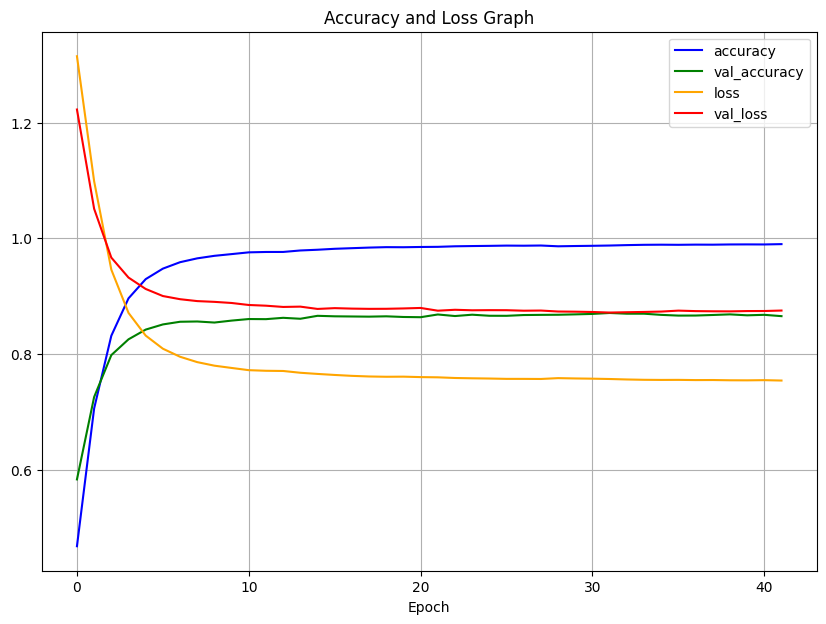

In [63]:
import matplotlib.pyplot as plt

# Assume we have these metrics tracked during training
# train_accuracies, val_accuracies, train_losses, val_losses

plt.figure(figsize=(10, 7))

# Plot accuracy
plt.plot(train_accuracies, label='accuracy', color='blue')
plt.plot(val_accuracies, label='val_accuracy', color='green')

# Plot loss
plt.plot(train_losses, label='loss', color='orange')
plt.plot(val_losses, label='val_loss', color='red')

# Graph details
plt.xlabel('Epoch')
plt.title('Accuracy and Loss Graph')
plt.legend()
plt.grid()

plt.show()

In [68]:
# Sample input (replace with your test input)
# Ensure the input data is preprocessed similarly to the training data
test_input = padded_test[1].reshape(1,len(padded_test[1]))  # Replace with actual tokenized and padded input
test_input_tensor = torch.tensor(test_input, dtype=torch.long).to(device)  # Convert to tensor and move to GPU

# Set the model to evaluation mode
model.eval()

# Disable gradient calculation for inference
with torch.no_grad():
    outputs = model(test_input_tensor)
    print(outputs)
    predictions = torch.argmax(outputs, dim=1)  # Get the class with the highest probability

# Print predictions
print("Predicted Class:", predictions.item())  # Convert tensor to Python int if predicting one sample


tensor([[7.8618e-08, 1.0000e+00, 8.7227e-08, 7.0039e-07]], device='cuda:0')
Predicted Class: 1


In [69]:
title_test[1]

'game thrones season spoilers top moments expect jon'

In [70]:
y_test[1]

array([False,  True, False, False])

https://chatgpt.com/c/67512614-ff48-8013-94c8-6ecda1719bce